In [48]:
from google.colab import files
uploaded = files.upload()

In [0]:
import pandas as pd

In [0]:
df= pd.read_csv('housepricedata (1).csv')

In [51]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df.isnull().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

In [54]:
df.dtypes

LotArea             int64
OverallQual         int64
OverallCond         int64
TotalBsmtSF         int64
FullBath            int64
HalfBath            int64
BedroomAbvGr        int64
TotRmsAbvGrd        int64
Fireplaces          int64
GarageArea          int64
AboveMedianPrice    int64
dtype: object

[50.14 49.86] %


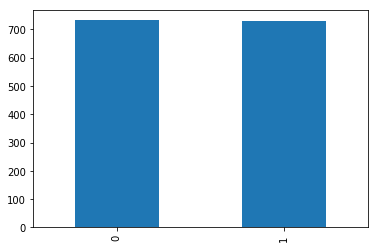

In [55]:
df['AboveMedianPrice'].value_counts().plot.bar()
mp=df['AboveMedianPrice'].value_counts()
median_price= np.array([mp])
hey=100*(np.divide(median_price[0],np.sum(median_price)))
print(np.round(hey, decimals=2),"%")

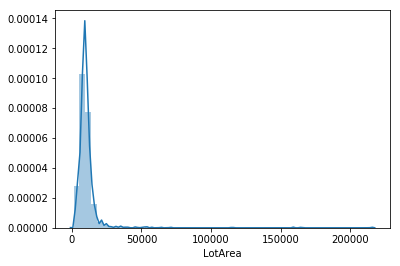

In [56]:
sns.distplot(df['LotArea'])

AboveMedianPrice,0,1
OverallQual,,
1,2,0
2,3,0
3,20,0
4,113,3
5,350,47
6,198,176
7,42,277
8,3,165
9,0,43


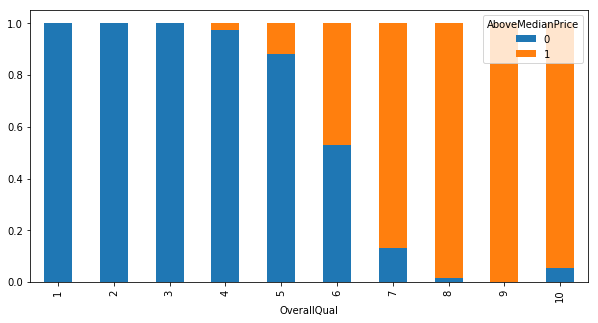

In [57]:
OverallQ= pd.crosstab(df['OverallQual'], df['AboveMedianPrice'])
OverallQ.div(OverallQ.sum(1).astype(float) , axis=0).plot.bar(figsize=(10,5), stacked=True)
OverallQ

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
x= df.drop('AboveMedianPrice', axis=1)
y= df['AboveMedianPrice']

In [0]:
minmax= MinMaxScaler()

In [61]:
x_scale= minmax.fit_transform(x)
x_scale

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_val_and_test, y_train, y_val_and_test=train_test_split(x_scale, y, test_size=0.3)

In [0]:
x_test, x_val, y_test, y_val= train_test_split(x_val_and_test, y_val_and_test, test_size=0.15)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model= Sequential([
    Dense(32, input_shape=(10,), activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(1, activation='sigmoid')
    
])

In [0]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [74]:
batch_size=32
epochs= 100
work= model.fit(x_train, y_train, batch_size=batch_size , epochs=epochs, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1022 samples, validate on 66 samples
Epoch 1/100
1022/1022 [==============================] - 1s 667us/step - loss: 0.7085 - acc: 0.5059 - val_loss: 0.7020 - val_acc: 0.5000
Epoch 2/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.6934 - acc: 0.5098 - val_loss: 0.6887 - val_acc: 0.5152
Epoch 3/100
1022/1022 [==============================] - 0s 37us/step - loss: 0.6801 - acc: 0.5137 - val_loss: 0.6762 - val_acc: 0.5303
Epoch 4/100
1022/1022 [==============================] - 0s 37us/step - loss: 0.6673 - acc: 0.5479 - val_loss: 0.6644 - val_acc: 0.5758
Epoch 5/100
1022/1022 [==============================] - 0s 38us/step - loss: 0.6552 - acc: 0.6115 - val_loss: 0.6531 - val_acc: 0.5758
Epoch 6/100
1022/1022 [==============================] - 0s 38us/step - loss: 0.6433 - acc: 0.6624 - val_loss: 0.6419 - val_acc: 0.6970
Epoch 7/100
1022/1022 [==============================] - 0s 44us/step - loss: 0.6318 - ac

In [75]:
model.evaluate(x_test, y_test)[1]

372/372 [==============================] - 0s 60us/step


0.8951612916044009

In [80]:
model.predict(x_test[:10])

array([[0.833642  ],
       [0.9338608 ],
       [0.9976938 ],
       [0.2884437 ],
       [0.03510734],
       [0.8949847 ],
       [0.08964902],
       [0.741271  ],
       [0.06583688],
       [0.94365776]], dtype=float32)

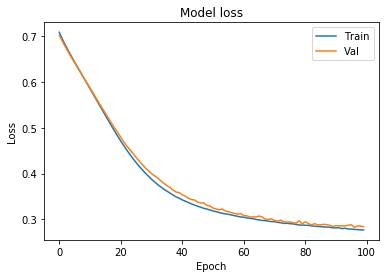

In [82]:
plt.plot(work.history['loss'])
plt.plot(work.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

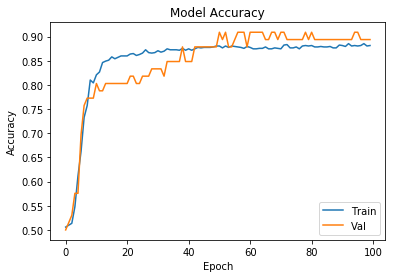

In [83]:
plt.plot(work.history['acc'])
plt.plot(work.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()